In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import sys
sys.path.append('../../modules')
from helper_functions import feature_reduction_x, heatmap

from datetime import datetime

C:\Users\Aidan\AppData\Local\Temp\ipykernel_29632\3213435659.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("../../data/training/BERRating_test_data.csv", sep=";", on_bad_lines="skip", low_memory=False)
print(df.shape)

(9997, 211)


In [4]:
X = feature_reduction_x(df)

c:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['SecondEnerConsumedComment' 'ThirdEnerConsumedComment']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 54  65 115 118 119 120 128 129 130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [5]:
print(X.shape)

(9997, 100)


In [6]:
y = df.EnergyRating

In [7]:
X = pd.get_dummies(X)

feature_names = X.columns
X.head()

,Year_of_Construction,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,HSMainSystemEfficiency,TGDLEdition,HSEffAdjFactor,...,FirstEnergyType_Description_Renewable Electrical,FirstEnergyType_Description_Renewable Thermal,FirstEnerProdComment_12 PV PANELS 290 W SOUTHWEST 4,FirstEnerProdComment_14 PV PANELS 270W WEST 45DEGRE,FirstEnerProdComment_9 PV PANELS 290 W SOUTHWEST 45,SecondEnergyType_Description_Renewable Thermal,ThirdEnergyType_Description_Renewable Thermal,FirstWallType_Description_Stone,FirstWallType_Description_Timber Frame,SecondWallDescription_SHAFT
0,0.996154,0.125000,0.034783,0.069565,0.170732,0.245614,0.237288,0.599211,0.75,0.909091,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.996154,0.125000,0.034783,0.069565,0.170732,0.245614,0.237288,0.599211,0.75,0.909091,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.692308,0.122518,0.330435,0.373913,0.528455,0.543860,0.511864,0.073965,0.00,0.757576,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.834615,0.086607,0.108696,0.056522,0.495935,0.473684,0.508475,0.046813,0.00,0.757576,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.688462,0.130583,0.121739,0.682609,0.617886,0.543860,0.508475,0.053501,0.00,0.757576,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, random_state=2)

In [9]:
best_score = 0
best_depth = 0

for d in range(2,15):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean = scores.mean()
    print("Depth: ", d, "Accuracy:", mean)
    if(mean > best_score):
        best_score = mean
        best_depth = d

Depth:  2 Accuracy: 0.3141252390482544
Depth:  3 Accuracy: 0.3582766288636869
Depth:  4 Accuracy: 0.3842879252835224
Depth:  5 Accuracy: 0.40456286413164333
Depth:  6 Accuracy: 0.4263050922837447
Depth:  7 Accuracy: 0.4407098954858795
Depth:  8 Accuracy: 0.44644518567934177
Depth:  9 Accuracy: 0.46005176784523016
Depth:  10 Accuracy: 0.46365354680898385
Depth:  11 Accuracy: 0.4672556815654881
Depth:  12 Accuracy: 0.47192510562597284
Depth:  13 Accuracy: 0.4775241271959084
Depth:  14 Accuracy: 0.4735231487658439


In [10]:
start_time = datetime.now()
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
end_time = datetime.now()

print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.7940509537148193
Test Accuracy: 0.488


Processing Time: 0:00:00.412848


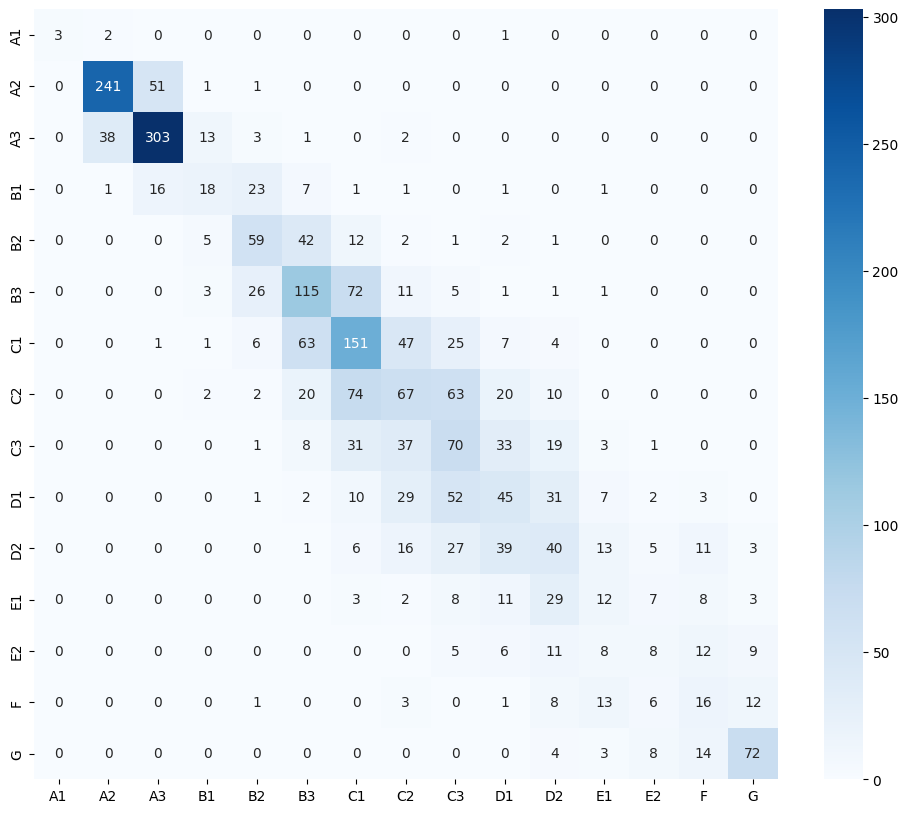

In [11]:

cm = confusion_matrix(y_test, y_hat)

#print("CM")
#print(cm)
print('Processing Time: {}'.format(end_time - start_time))

heatmap(cm)

In [ ]:
dot_data = StringIO()
target_names = ["A3", "C1", "A2", "C2", "B3", "C3", "D1", "D2", "B2", "G", "E1", "B1", "F", "E2", "A1"]
export_graphviz(model, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True,
                class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('BER_DecisionTree.png')
Image(graph.create_png())